In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/sample_data/SMSSpamCollection",sep='\t', names=['label','message'])#mention the name of file to be extracted

df 


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df['totalwords'] = df['message'].str.split().str.len() # Calculate word count

In [4]:
data = df.loc[df['totalwords'] > 5] #Removing all reviews having less than two words

In [5]:
data = data.drop('totalwords',axis = 1)

In [6]:
df = data[data['message'].map(lambda x: x.isascii())] #Removing all non-english reviews

In [7]:
df = df.dropna(how='all') # dropping blank rows

In [8]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5564,ham,Why don't you wait 'til at least wednesday to ...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
xx = df['message'].to_string(header=False, index=False)

In [10]:
import re


def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text


# Example string with weird font characters plus an URL which we gonna remove.
sample =  xx

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")

Text after removing url:- 
 Go until jurong point, crazy.. Available only i...
                     Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final...
 U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives arou...
Even my brother is not like to speak with me. T...
As per your request 'Melle Melle (Oru Minnaminu...
Had your mobile 11 months or more? U R entitled...
I'm gonna be home soon and i don't want to talk...
SIX chances to win CASH! From 100 to 20,000 pou...
I've been searching for the right words to than...
               I HAVE A DATE ON SUNDAY WITH WILL!!
XXXMobileMovieClub: To use your credit, click t...
Eh u remember how 2 spell his name... Yes i did...
         Is that seriously how you spell his name?
Aft i finish my lunch then i go str down lor. A...
Ffffffffff. Alright no way I can meet up with y...
Just forced myself to eat a slice. I'm really n...
Did you catch the bus ? Are you frying an egg ?...
I'm

In [11]:
!pip install demoji
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")

Streaming output truncated to the last 5000 lines.
Me too. Mark is taking forever to pick up my pr...
             Got smaller capacity one? Quite ex...
Check Out Choose Your Babe Videos @ sms.shsex.n...
        Im good! I have been thinking about you...
Not thought bout it... || Drink in tap & spile ...
        I am going to sleep. I am tired of travel.
                     Haha, just what I was thinkin
Yup but it's not giving me problems now so mayb...
Lol no. Just trying to make your day a little m...
How long before you get reply, just defer admis...
The word "Checkmate" in chess comes from the Pe...
            Po de :-):):-):-):-). No need job aha.
    Rats. Hey did u ever vote for the next themes?
                     I hope your pee burns tonite.
OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I ...
                 Yay can't wait to party together!
        ....photoshop makes my computer shut down.
All boys made fun of me today. Ok i have no pro...
That's one of the issues but ca

In [12]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text


sample = sample
print(sample)
print(word_tokenizer(sample[0]))#why 0 as the data set is huge thete error that data rate limit has been reached

Go until jurong point, crazy.. Available only i...
                     Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final...
 U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives arou...
Even my brother is not like to speak with me. T...
As per your request 'Melle Melle (Oru Minnaminu...
Had your mobile 11 months or more? U R entitled...
I'm gonna be home soon and i don't want to talk...
SIX chances to win CASH! From 100 to 20,000 pou...
I've been searching for the right words to than...
               I HAVE A DATE ON SUNDAY WITH WILL!!
XXXMobileMovieClub: To use your credit, click t...
Eh u remember how 2 spell his name... Yes i did...
         Is that seriously how you spell his name?
Aft i finish my lunch then i go str down lor. A...
Ffffffffff. Alright no way I can meet up with y...
Just forced myself to eat a slice. I'm really n...
Did you catch the bus ? Are you frying an egg ?...
I'm back &amp; we're packing th

In [14]:
import nltk 
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    
    return text


print(f"Before removing stopwords : {word_tokenizer(sample[0])}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample[0]))}")

Before removing stopwords : ['g']
After removing stopwords : ['g']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
def preprocessing(text):
    
    text = remove_url(text) 
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [16]:
import spacy
sp = spacy.load("en_core_web_sm")

In [17]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review'] = df['message'].progress_map(preprocessing)

100%|██████████| 4399/4399 [00:02<00:00, 1900.03it/s]


In [18]:
a=df['clean_review']
a

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5564                dont wait til least wednesday see get
5566    reminder o2 get 250 pounds free call credit de...
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: clean_review, Length: 4399, dtype: object

In [20]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

NameError: ignored

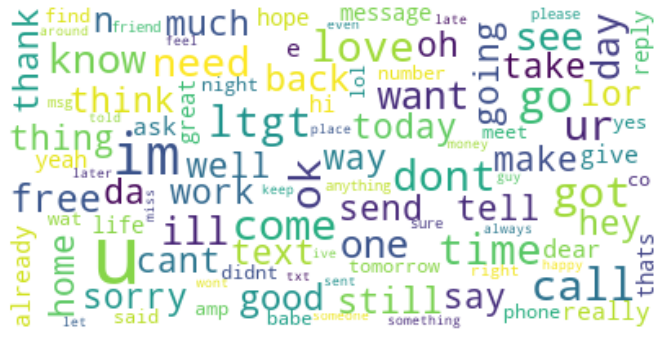

In [19]:
#  Word clouds
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(review for review in a)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
pip install --user gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import gensim #Topic Modelling Technicque called LDA (Latent Dirichlet Allocation)
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df['clean_review']
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat']


In [24]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [25]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['crypto','even','early'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [27]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [28]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [29]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ','ADV'])
#print(data_lemmatized[:1])

In [30]:
print(data_lemmatized[:1])

[['available', 'bugis', 'great', 'amore', 'wat']]


In [31]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (3, 1), (8, 1), (12, 1)]]


In [32]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [48]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 8, #change it 1-10
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=4,
                                           per_word_topics=True)

In [49]:
from gensim.models import CoherenceModel
# Compute Coherence Score for topic 2
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5608323955459578


In [50]:
from pprint import pprint
# Print the Keyword in the 2 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.059*"good" + 0.035*"back" + 0.034*"ill" + 0.029*"night" + 0.029*"later" + '
  '0.029*"way" + 0.021*"smile" + 0.020*"last" + 0.019*"name" + 0.017*"amp"'),
 (1,
  '0.047*"call" + 0.041*"week" + 0.037*"great" + 0.033*"mobile" + 0.026*"late" '
  '+ 0.026*"also" + 0.018*"bad" + 0.016*"important" + 0.013*"camera" + '
  '0.011*"money"'),
 (2,
  '0.041*"still" + 0.037*"work" + 0.029*"min" + 0.023*"problem" + 0.021*"guy" '
  '+ 0.018*"sure" + 0.016*"moment" + 0.015*"malaria" + 0.013*"kiss" + '
  '0.011*"med"'),
 (3,
  '0.027*"already" + 0.026*"point" + 0.023*"account" + 0.022*"number" + '
  '0.018*"life" + 0.018*"morning" + 0.016*"private" + 0.016*"statement" + '
  '0.015*"unredeemed" + 0.014*"code"'),
 (4,
  '0.036*"well" + 0.032*"friend" + 0.029*"ltgt" + 0.025*"hour" + 0.025*"even" '
  '+ 0.020*"happy" + 0.017*"mom" + 0.015*"shit" + 0.015*"need" + '
  '0.014*"alone"'),
 (5,
  '0.066*"day" + 0.030*"thing" + 0.029*"home" + 0.028*"soon" + 0.025*"new" + '
  '0.022*"today" + 0.019*"stuff